In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_json("../data/cities.json")
df.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


<Axes: xlabel='US State', ylabel='Cities in top 1000 most populous'>

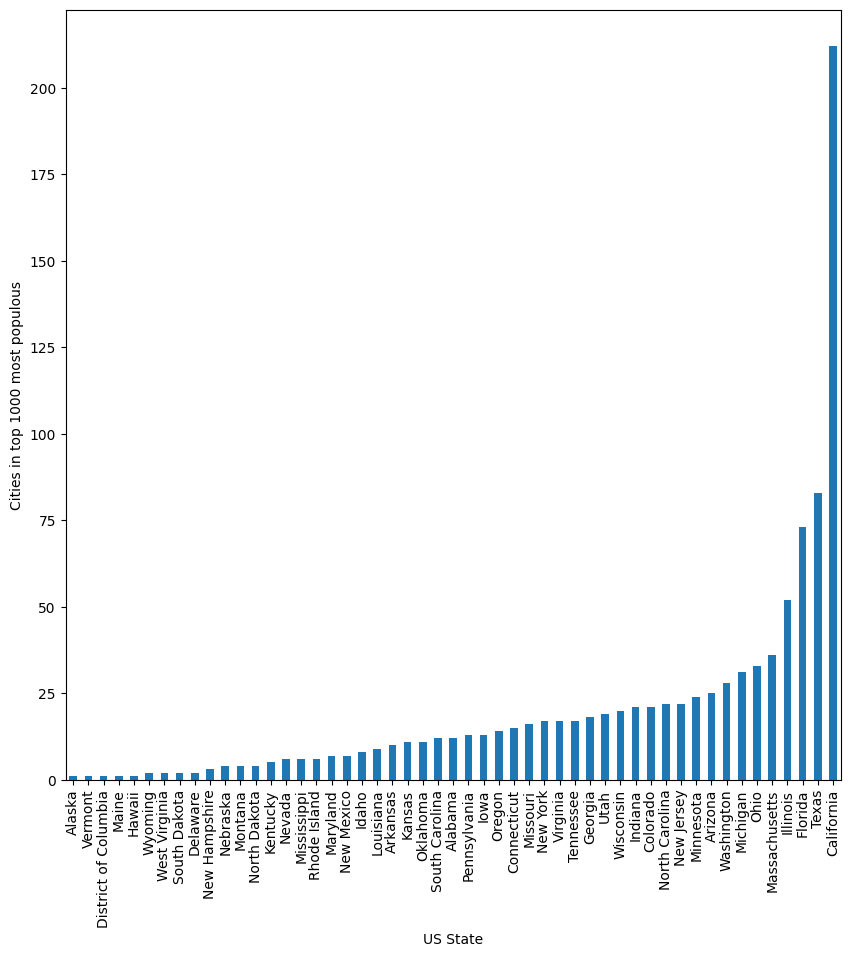

In [99]:
# How many of the top 1000 cities are in each state
df.groupby("state")["city"].count().sort_values().plot(
    kind="bar",
    ylabel="Cities in top 1000 most populous",
    xlabel="US State",
    figsize=(10, 10),
)

<Axes: xlabel='city'>

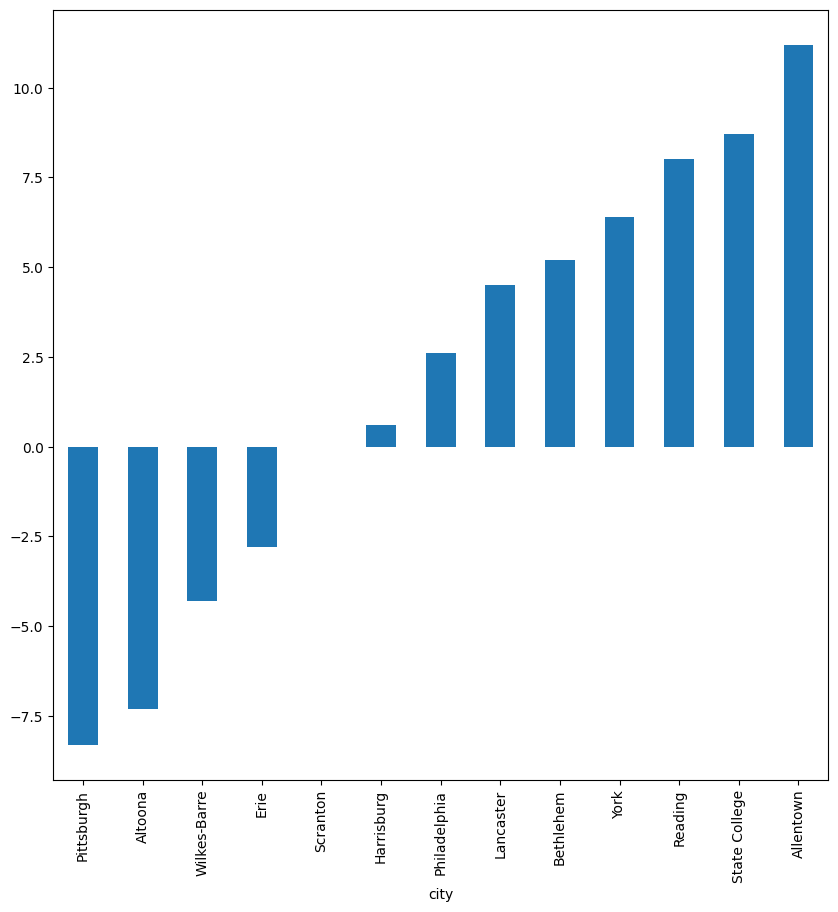

In [100]:
# bar plot comparing the growth of all cities in Pennsylvania
(
    df.loc[df["state"] == "Pennsylvania", ["city", "growth_from_2000_to_2013"]]
    .set_index("city")["growth_from_2000_to_2013"]
    .str.rstrip("%")
    .astype(float)
    .sort_values()
    .plot(kind="bar", figsize=(10, 10))
)

<Axes: ylabel='population'>

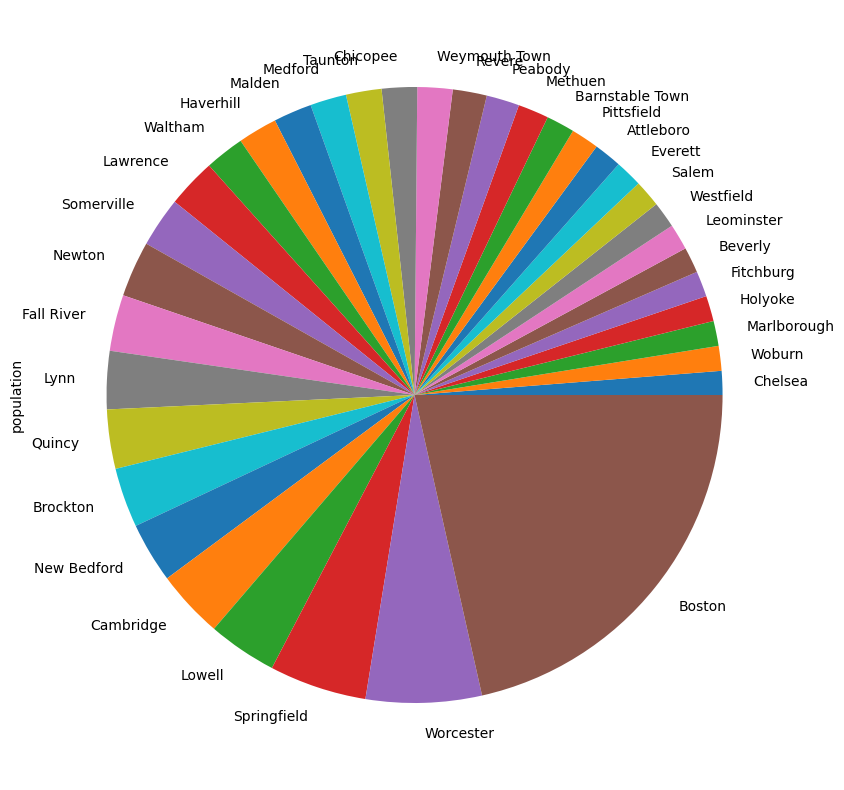

In [101]:
# pie plot for each massachusetts city and how it contributes to the overall population
(
    df.loc[df["state"] == "Massachusetts"]
    .set_index("city")["population"]
    .sort_values()
    .plot(kind="pie", figsize=(10, 10))
)

<Axes: xlabel='longitude', ylabel='latitude'>

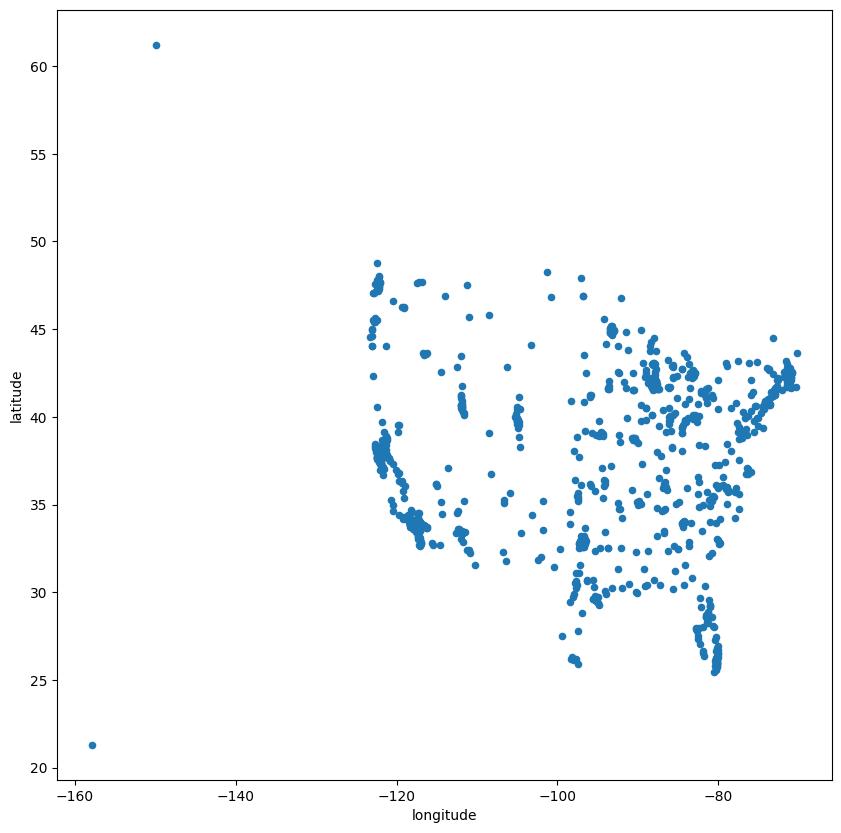

In [102]:
# scatter plot of all cities with longitude on the x axis and latitude on the y axis
(
    df.set_index("city")[["longitude", "latitude"]].plot(
        kind="scatter", x="longitude", y="latitude", figsize=(10, 10)
    )
)

# Extension questions
1. Create a histogram of the growth rates of cities in Texas and Michigan
2. Create a histogram of the growth rates of cities in Texas and California
3. Create a bar plot of the average growth per state

In [103]:
df["growth_from_2000_to_2013"] = (
    df["growth_from_2000_to_2013"]
    .str.rstrip("%")
    .replace("", np.NaN)
    .dropna()
    .astype(np.float16)
)

<Axes: ylabel='Frequency'>

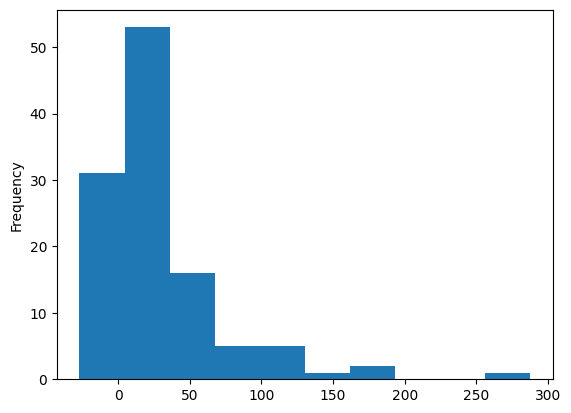

In [104]:
# histogram of growth rate of texas as michigan
(
    df.loc[
        df["state"].isin(["Texas", "Michigan"]), ["city", "growth_from_2000_to_2013"]
    ]
    .set_index("city")["growth_from_2000_to_2013"]
    .plot.hist()
)

<Axes: ylabel='Frequency'>

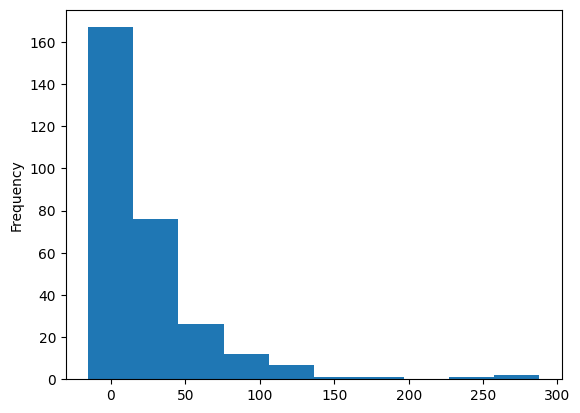

In [105]:
# histogram of texas and california
(
    df.loc[
        df["state"].isin(["Texas", "California"]), ["city", "growth_from_2000_to_2013"]
    ]
    .set_index("city")["growth_from_2000_to_2013"]
    .dropna()
    .astype(np.float16)
    .plot.hist()
)


<Axes: xlabel='state', ylabel='Avg Growth Rate 2000-2013'>

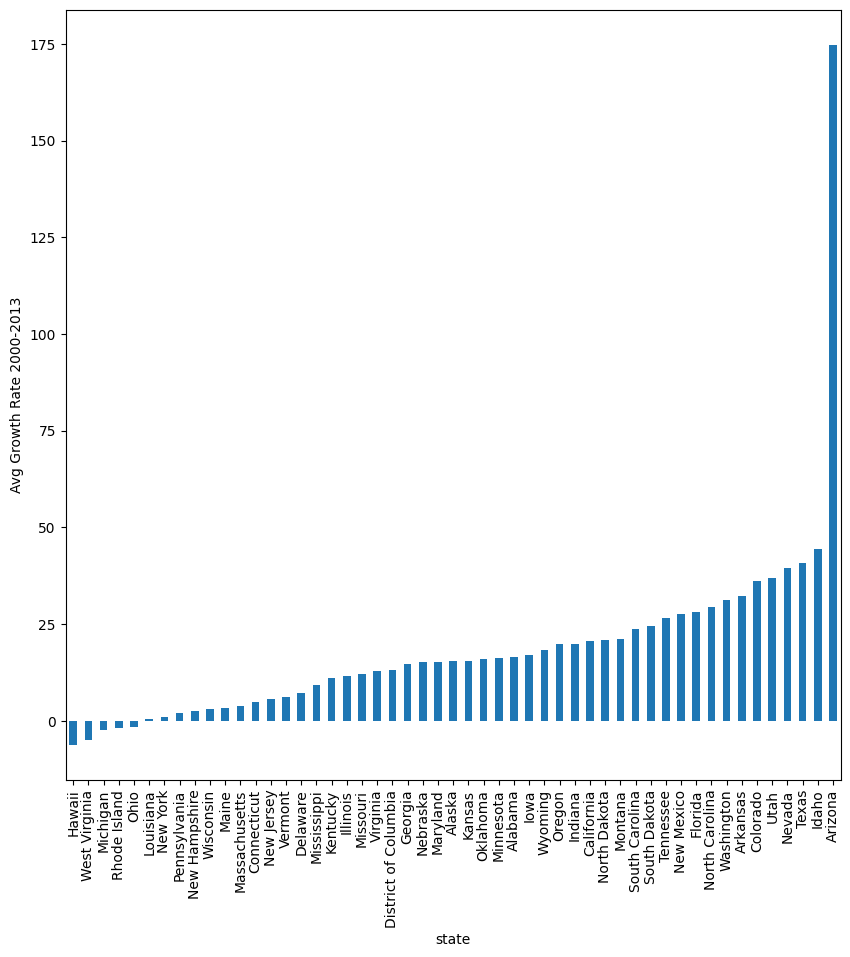

In [111]:
# bar plot of the average growth rate per state
(
    df.groupby("state")["growth_from_2000_to_2013"]
    .mean()
    .sort_values()
    .plot(kind="bar", figsize=(10, 10), ylabel="Avg Growth Rate 2000-2013")
)


<Axes: xlabel='state'>

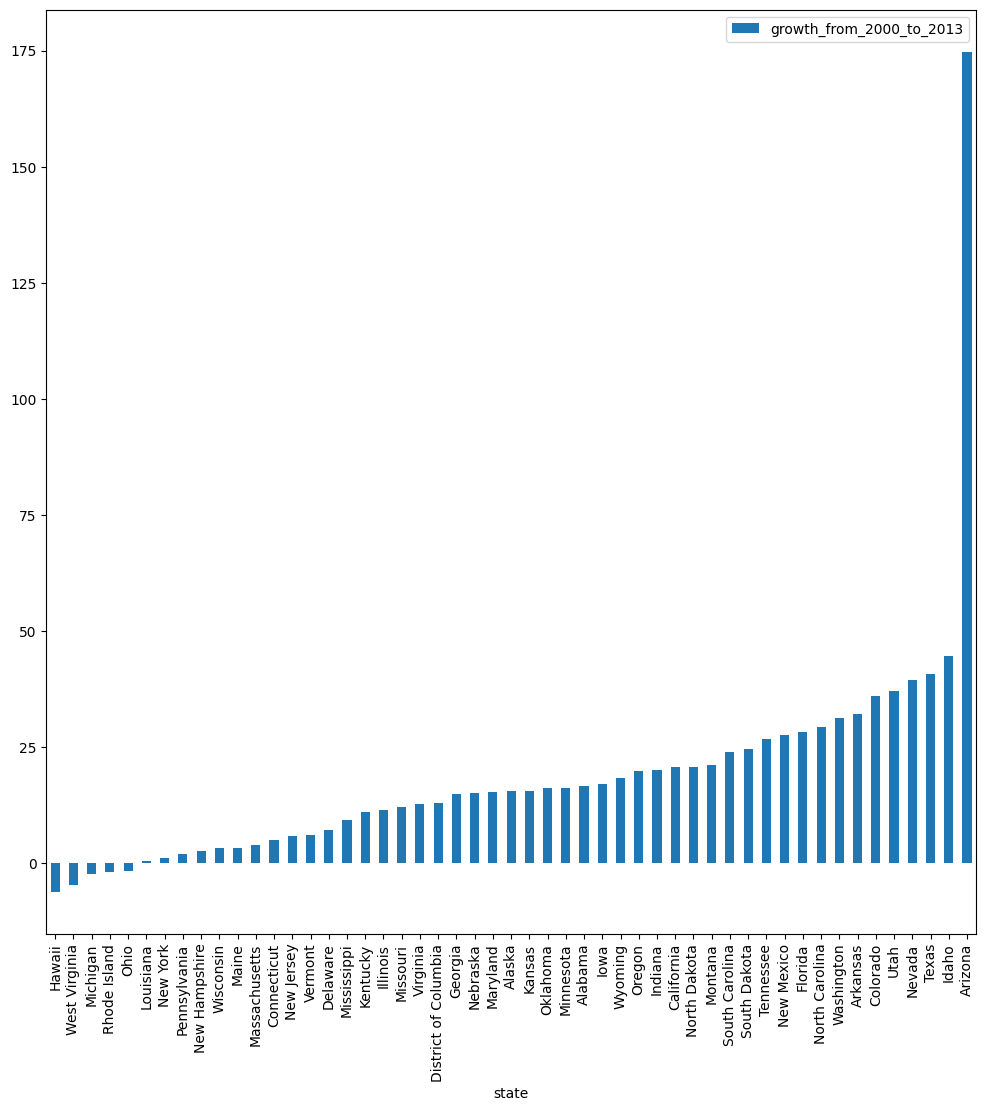

In [114]:
# book version
(
    df[["state", "growth_from_2000_to_2013"]]
    .set_index("state")["growth_from_2000_to_2013"]
    .reset_index()
    .groupby("state")
    .mean()
    .sort_values(by="growth_from_2000_to_2013")
    .plot.bar(figsize=(12, 12))
)

In [119]:
# what's up with Arizona?
df.loc[df["state"] == "Arizona"]
# Maricopa grew from around 1,000 to 43,000 from 2000 to 2010
# from 1.5k to 19.5k from 2005-2006
# in general Arizona has lots of much smaller cities which would be overrepresented
# when only looking at percentage growth with a few thousand more people

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
5,Phoenix,14.000000,33.448377,-112.074037,1513367,6,Arizona
32,Tucson,7.500000,32.221743,-110.926479,526116,33,Arizona
37,Mesa,13.500000,33.415184,-111.831472,457587,38,Arizona
78,Chandler,38.687500,33.306160,-111.841250,249146,79,Arizona
86,Glendale,5.699219,33.538652,-112.185987,234632,87,Arizona
91,Gilbert,96.000000,33.352826,-111.789027,229972,92,Arizona
94,Scottsdale,11.000000,33.494170,-111.926052,226918,95,Arizona
142,Tempe,5.800781,33.425510,-111.940005,168228,143,Arizona
148,Peoria,46.500000,33.580596,-112.237378,162592,149,Arizona
215,Surprise,282.000000,33.629234,-112.367928,123546,216,Arizona
